In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
sns.set(rc = {"figure.figsize": (9,7)})

In [3]:
df = pd.read_csv("titanic_data.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## numerical value analysis

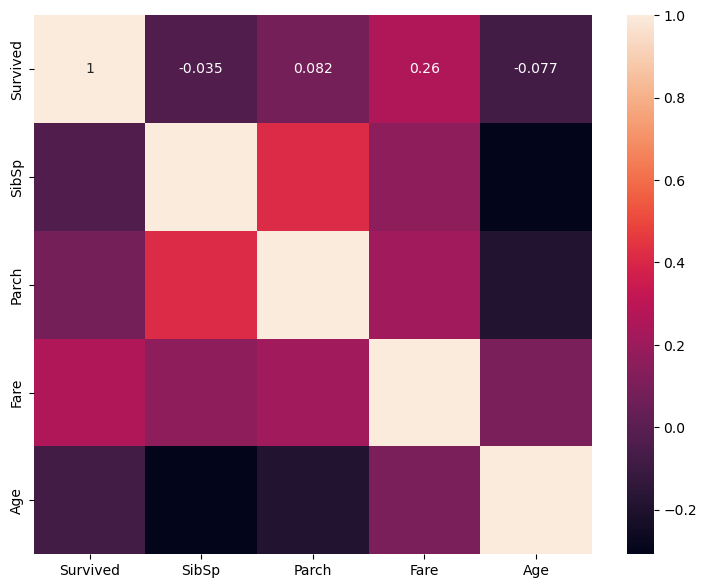

In [13]:
plt.figure(figsize=(9,7))
heatmap = sns.heatmap(df[["Survived","SibSp","Parch","Fare","Age"]].corr(numeric_only = True), annot = True)

In [16]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

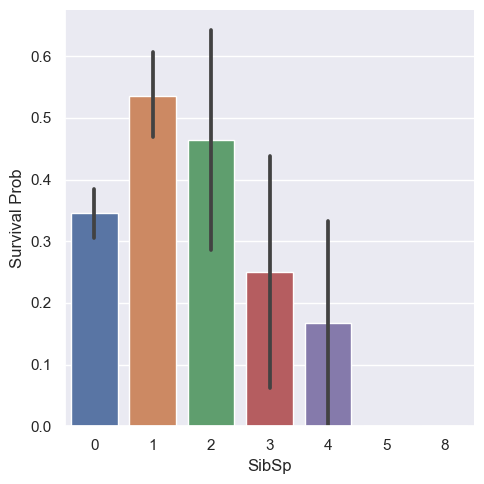

In [22]:
sns.catplot(x = "SibSp", y = "Survived", data = df, kind="bar").set_ylabels("Survival Prob")

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level f

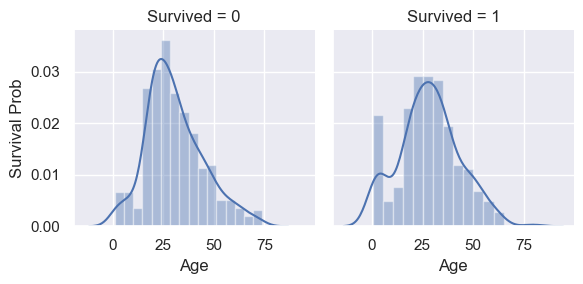

In [26]:
age_visual = sns.FacetGrid(df, col= "Survived")
age_visual = age_visual.map(sns.distplot, "Age").set_ylabels("Survival Prob")

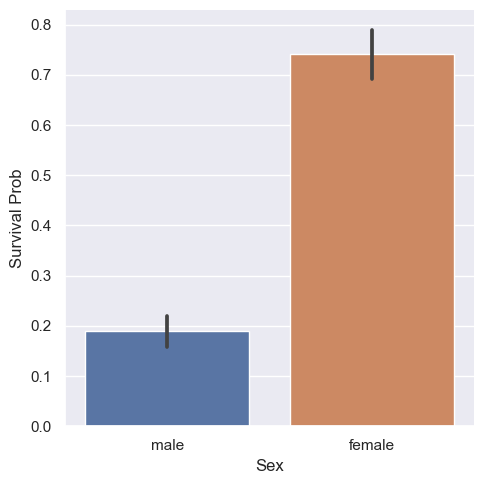

In [27]:
sns.catplot(x = "Sex", y = "Survived", data = df, kind="bar").set_ylabels("Survival Prob")

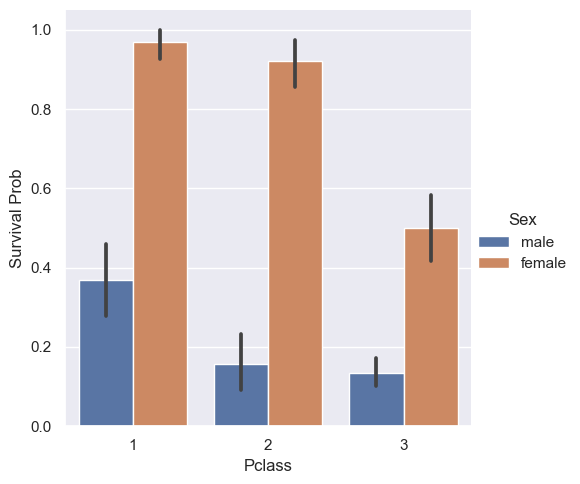

In [30]:
sns.catplot(x = "Pclass", y = "Survived", data = df, kind="bar", hue = "Sex").set_ylabels("Survival Prob")

In [33]:
df["Embarked"].isnull().sum()

2

In [35]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
df["Embarked"] = df["Embarked"].fillna("S")

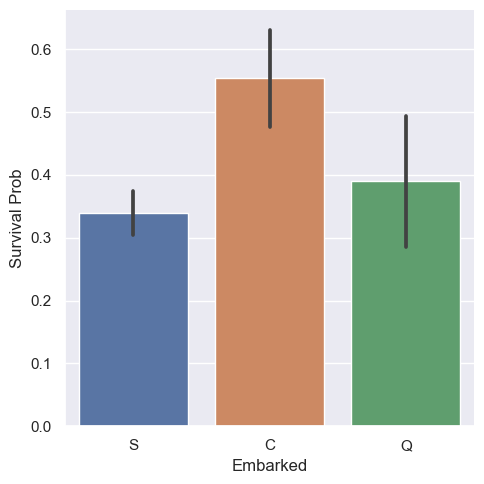

In [37]:
sns.catplot(x = "Embarked", y = "Survived", data = df, kind="bar").set_ylabels("Survival Prob")

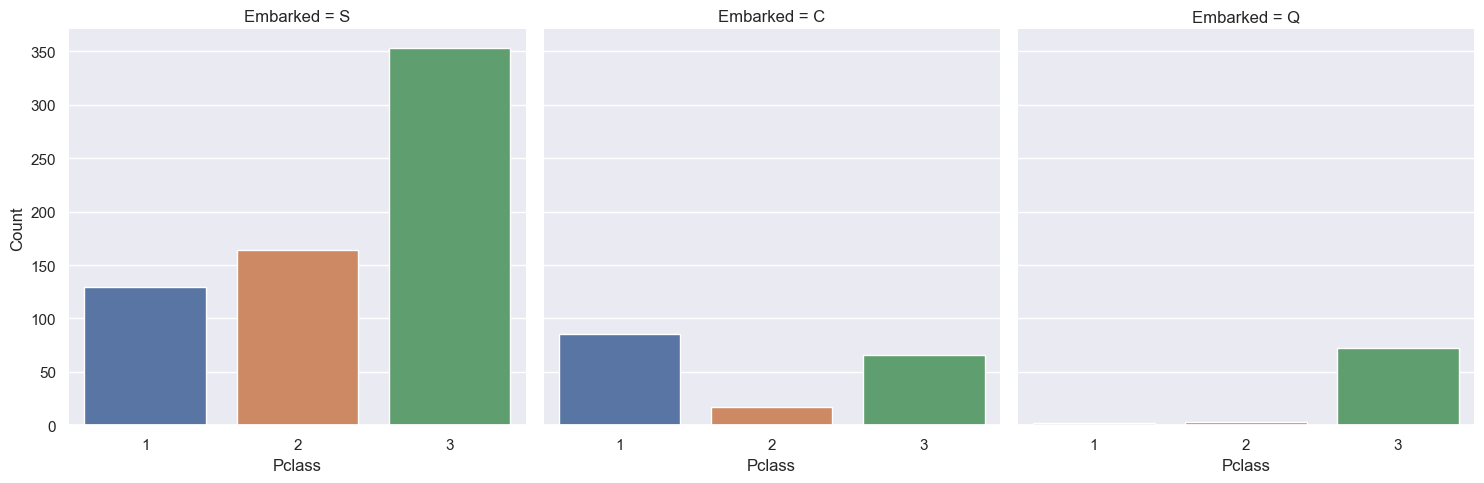

In [41]:
# Explore Pclass vs Embarked 
g = sns.catplot(x = "Pclass",col="Embarked", data = df, kind="count").set_ylabels("Survival Prob")
g.despine(left=True)
g = g.set_ylabels("Count")

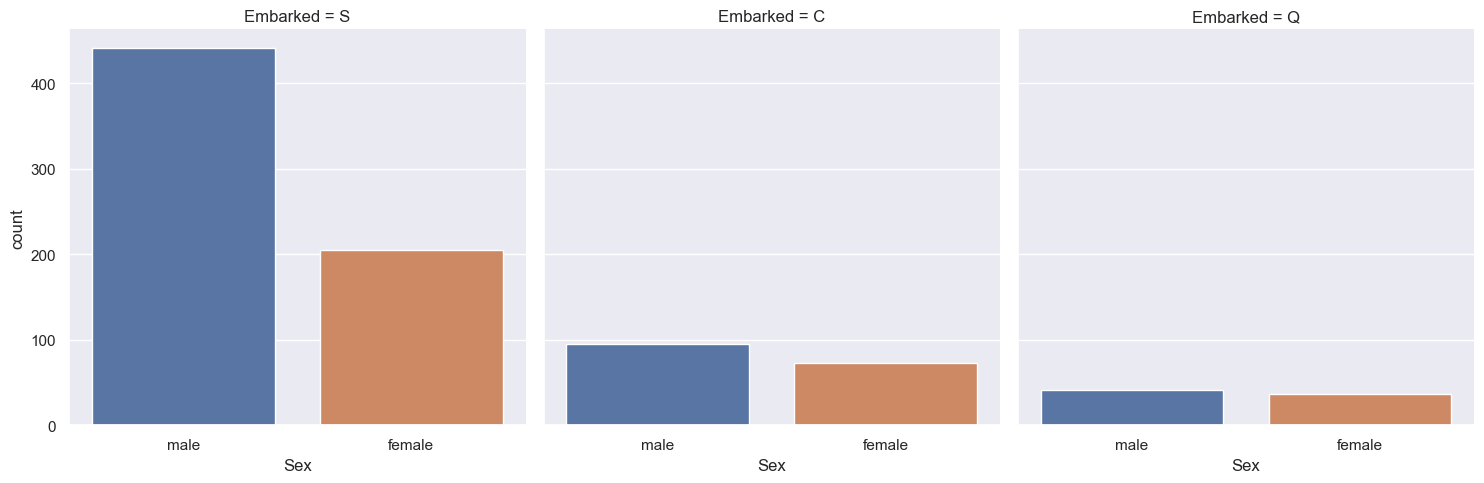

In [42]:
g = sns.catplot(x = "Sex", col="Embarked",  data=df, kind="count")

## preparing data

In [43]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
mean = df["Age"].mean()

In [46]:
std = df["Age"].std()

In [47]:
is_null = df["Age"].isnull().sum()

In [48]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [49]:
random_age = np.random.randint(mean-std,mean+std,177)

In [50]:
random_age

array([30, 20, 24, 31, 34, 21, 33, 40, 17, 18, 19, 37, 31, 40, 16, 25, 19,
       30, 40, 25, 38, 23, 35, 37, 28, 34, 24, 28, 21, 15, 35, 31, 17, 40,
       21, 39, 38, 39, 29, 18, 38, 25, 23, 15, 29, 25, 21, 19, 43, 30, 34,
       42, 40, 32, 19, 30, 37, 42, 21, 15, 25, 17, 30, 38, 27, 18, 35, 27,
       16, 36, 34, 27, 33, 35, 38, 30, 33, 16, 15, 28, 35, 42, 25, 18, 17,
       32, 25, 25, 18, 17, 19, 16, 27, 17, 38, 34, 38, 34, 21, 28, 22, 16,
       18, 20, 37, 40, 36, 37, 40, 17, 32, 25, 16, 35, 15, 31, 15, 18, 32,
       16, 41, 22, 16, 38, 17, 26, 27, 17, 21, 26, 23, 19, 33, 28, 16, 38,
       36, 29, 33, 24, 25, 40, 42, 31, 31, 38, 27, 41, 15, 30, 40, 39, 43,
       36, 29, 26, 25, 16, 16, 31, 25, 22, 32, 24, 41, 40, 42, 34, 17, 28,
       41, 17, 17, 17, 31, 35, 21])

In [51]:
a = df["Age"].copy()

In [56]:
a[np.isnan(a)] = random_age

In [57]:
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [58]:
df["Age"] = a

In [59]:
df["Age"].isnull().sum()

0

In [60]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
df["Embarked"] = df["Embarked"].fillna("S")

In [62]:
df.drop(['PassengerId','Cabin', 'Ticket','Name'], axis = 1,inplace=True)

In [63]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,21.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [64]:
df["Sex"] = df["Sex"].map({"male":0,"female":1})

In [65]:
df['Embarked'] = df['Embarked'].map({"S": 0, "C": 1, "Q": 2})

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [68]:
x = df.drop(df.columns[[0]], axis = 1)
y = df['Survived']

In [69]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [70]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

## Classification

In [71]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [72]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [73]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [74]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [75]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  80.22
Support Vector      :  81.34
Decision Tree       :  76.49
K-NN Classifier     :  80.6
Random Forest       :  83.58
